# Authors:


> *Catarina Balsas*

> *Emilio Banqueri*

> *João Santos*

> *Susana Viegas*












# Zillow Estimate

Unquestionably, the real estate market is continuously in the spotlight as it plays a
crucial role in our daily lives. People are constantly moving from one house to another. Indeed,
during their lifetime, Americans move an average of 11,7 times, and between 2012 and 2013,
a total of 35.9 million people aged one year or older moved.
1 The reasons are numerous,
upsizing or downsizing home, job relocations, marriage or retirement, or even simply changing
neighborhoods. From these decisions, some questions may arise: How much does the house
cost? What is its real value? Is the purchase worth it?. In order to provide assistance to these
issues, Zillow, a real estate and renting marketplace in the U.S., dedicated to serving the full
lifecycle of owning and living in a home: buying, selling, renting, financing and remodeling,
came up with a solution. Zestimate was created, based on a database with more than 110 million
U.S. homes, and currently delivers home valuations estimations for more than 97,5 million of
them. This achievement was possible due to the recurrence to millions of statistics and multiple
Machine Learning models that are able to analyse hundreds of data points for each individual
home. It was the first time consumers had access to this type of information regarding home
prices and valuations at no cost. These outcomes/results were as well highly beneficial to
sellers, who saw in some way answers to the questions: Which house is going to sell? How
much is the sold price of a house?


Nevertheless, not everything was perfect and some concerns over the accuracy of the
model arose, with a Wall Street Journal stating that predictions are “often are very good,
frequently within a few percentage points of the actual price paid. But when Zillow is bad, it
can be terrible”. Zillow is also very careful, encouraging sellers and buyers to do their own
research or to get a professional appraisal. Improving the models accuracy is key to increase
trust in the predictions.


The challenge this work aims to tackle is to enhance the performance, i.e. the quality
of the predictions made by Zestimate. To do so, a dataset containing a full list of the real estate
properties in the three counties Los Angeles, Orange and Ventura, in California, from the years
2016 and 2017, with all the properties with their home features and transactions will be
examined and used for further analysis. The main focus will be to calculate the log-error of the
1
Storage, S., 2020. How Many Times Does The Average Person Move In A Lifetime?. [online] Steinwaymovers.com. Available at:
<https://www.steinwaymovers.com/news/how-many-times-does-the-average-person-move-in-a-lifetime> [Accessed 15 May 2020].
3
Zestimate model. To conduct this study, a Machine Learning model will be elaborated. Given
the large problem scale (coming from a large amount of data and variables), as well as the high
complexity of rules (complex task), Machine Learning is the most useful tool to use in this
situation. Moreover, there is no existing formula or equation suitable for the issue.


To execute this project, there were some different options of models that could have
been chosen. The model will take as inputs, that work as independent variables, several features
such as the Architectural Style, the number of Bedrooms and the Year of Construction. These
will provide an explanation to the log-error value, the label. As the algorithm is employed to
learn the mapping function from the input variable to the output variable, it is classified as a
Supervised Machine Learning model. Accordingly, whenever there is new input data, the
output will be predicted, within the model possibilities. Inside this model class, lie other types:
Classification and Regression. The two diverge in the sense that the first one returns a discrete
or categorical output, while the second delivers a numerical or continuous value. Once, the
focus of this specific model is to assess the log-error for each individual house as accurately
as possible, the decimal cases are indeed important to take into account, therefore the
Regression type of model was the selected one for this project.


In the last instance, this model will be based on the Residual Analysis, i.e. the difference
between the observed and the predicted values of the dependent variable. These residuals are,
then, the unexplained part (or error) of the model currently being used. This assessment will
prove to be extremely useful in the way that it will allow for the identification of the models
that are failing and those that are betterly performing. Those models can later be corrected, and
that improvement in the prediction be translated into a winning in what concerns sales
observations.

---
## 1. Setup - Importing necessary Libraries

In [0]:
import numpy as np
import pandas as pd
from sklearn import neighbors
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import missingno as msno 

import warnings
warnings.filterwarnings("ignore")

---
## 2. Business Problem

<div style="text-align: justify">Zillow is an online real state marketplace. One of its competitive advantages with respect to their competitors is that it has an accurate algorithm that predicts home sale prices on the basis of inputs provided by home sellers. This allows the potential sellers to have a very good approximation of their house value and improve their decision-making. Although already accurate, the Zillow algorithm can be further improved and this is where the scope of this model plays its role. A complex model that captures non-linearities such as XGBoost can serve to the purpose of improving Zillow's predictions. It is with the aim of this project, that the model helps indentifying and explaining the difference in the price predicted by Zestimate model and the actual sales price. Moreover, the findings can be exploited, in the form of reducing the future log-errors. Therefore, it is suggested an update of the Zillow's current algorith with the residual errors predicted by this model.</div>

---
## 3. Methodology

<div style="text-align: justify">The project is a supervised regression problem, where the objective is to predict the residual error between the property house price, provided by the Zestimate, and the actual sale price. The methodology follows the procedure of, first training the model on the properties of 2016, and fine tuning the best hyperparameters in that model. Afterwards, the algorithm can be applied to properties in 2017 and the results with the log-error from the properties in 2017 assessed. Once these models are trained, they can be used to predict the Zestimate's residual error of any given properties.</div>

---
## 4. Data Understanding
### a) Importing Datasets

<div style="text-align: justify">To start the necessary datasets from Zillow were imported, namely the 2016 and 2017 files, with all the properties with their home features. Moreover, the dictionary was also loaded to better understand each one of the variables. Intuitively, it was discovered that the respective datasets have 58 columns and 2,985,217 entries, each. Finally, it was perceived as well, naively, that there were a lot of missing values, that needed to be dealt with.</div>

In [0]:
# Properties 2016

properties_2016 = pd.read_csv("properties_2016.csv")
properties_2016.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [0]:
# Properties 2017

properties_2017 = pd.read_csv("properties_2017.csv")
properties_2017.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2016.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,5.0,NaN,NaN,NaN,...,1.0,NaN,660680.0,1434941.0,2016.0,774261.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,6.0,NaN,NaN,...,1.0,NaN,580059.0,1174475.0,2016.0,594416.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,1.0,NaN,196751.0,440101.0,2016.0,243350.0,5725.17,NaN,NaN,NaN


In [0]:
# Dimensions of the datasets

print(properties_2016.shape)
print(properties_2017.shape)

(2985217, 58)
(2985217, 58)


In [0]:
# Dictionary

dicts = pd.read_excel('zillow_data_dictionary.xlsx')
dicts.head()

,Feature,Description
0,'airconditioningtypeid',Type of cooling system present in the home (i...
1,'architecturalstyletypeid',"Architectural style of the home (i.e. ranch, ..."
2,'basementsqft',Finished living area below or partially below...
3,'bathroomcnt',Number of bathrooms in home including fractio...
4,'bedroomcnt',Number of bedrooms in home


---
### b) Dependent Variable, Log-error
<br>
<div style="text-align: justify">Afterwards, it was decided that it was logical to include the dependent variable, log-error, in the aggregate dataset. The log-error corresponds to the difference between the Zestimate (estimation price based on Zillow model) and the actual sale price, given all the features of a home. It is important to highlight that the number of observations in the training set is much lower when compared to the number seen in properties_2016.csv. Therefore, the merge process will yield the same number of observations as the training dataset, which is 90,275. The log error is, then, defined as:</div>

<br>
<center>$logerror = log(Zestimate)−log(SalePrice)$</center>


In [0]:
# Loading Logerror 

train2016 = pd.read_csv('train_2016_v2.csv', parse_dates=['transactiondate'], low_memory=False)

In [0]:
# Merging Properties with Logerror

df_train = train2016.merge(properties_2016, how='left', on='parcelid') # or inner

In [0]:
# Dimension of the dataset

df_train.shape

(90275, 60)

---
## 5. Exploratory Data Analysis
### a) Dependent Variable, Log-error

<div style="text-align: justify">When dealing with a set of data, often the first thing one will want to do is to get a sense of how the variables are distributed. Thus, the first step was to understand the values of the log-error. A great way to get started exploring a single variable is with a histogram. A histogram divides the variable into bins, counts the data points in each bin, and shows the bins on the x-axis and the counts on the y-axis. The next two graphical representations help understanding how the distribution of the dependent variable is set across the dataset.</div>

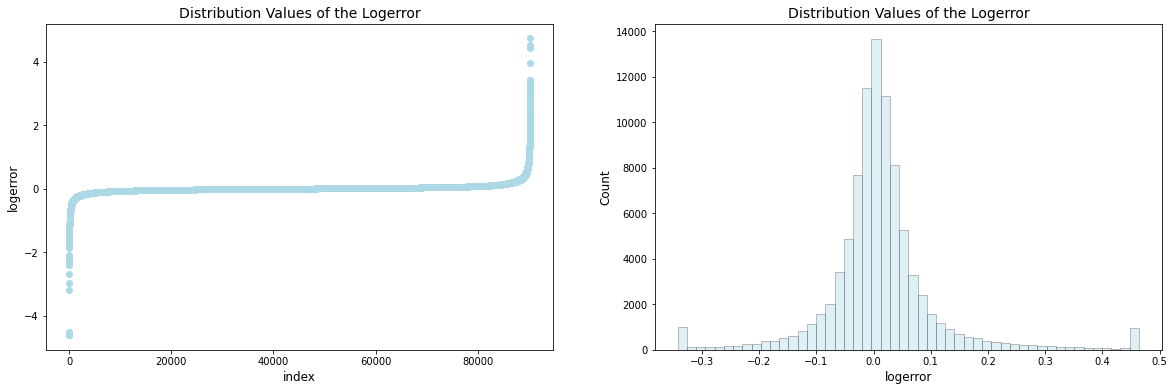

In [0]:
plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
plt.scatter(range(df_train.shape[0]), np.sort(df_train.logerror.values), color="lightblue")
plt.xlabel('index', fontsize=12)
plt.ylabel('logerror', fontsize=12)
plt.title("Distribution Values of the Logerror", fontsize=14)

plt.subplot(1, 2, 2)
ulimit = np.percentile(df_train.logerror.values, 99)
llimit = np.percentile(df_train.logerror.values, 1)
df_train['logerror'].loc[df_train['logerror']>ulimit] = ulimit
df_train['logerror'].loc[df_train['logerror']<llimit] = llimit

sns.distplot(df_train.logerror.values, bins=50, kde=False, color="lightblue", hist_kws=dict(edgecolor="#3F3F3F", linewidth=0.8))
plt.xlabel('logerror', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title("Distribution Values of the Logerror", fontsize=14)

plt.show()

---
<div style="text-align: justify">Moreover, it was decided that it would be necessary to see how different variables behaved with the log-error. The code below with all columns was run, and it was seen that most of them were not individually significant to explain the log-error. Arising from this, only the ones that are visually more appealing and provided, to a potential manager, more insights regarding the individual features and the dependent variable were selected. The result can be seen in the plot below.</div>

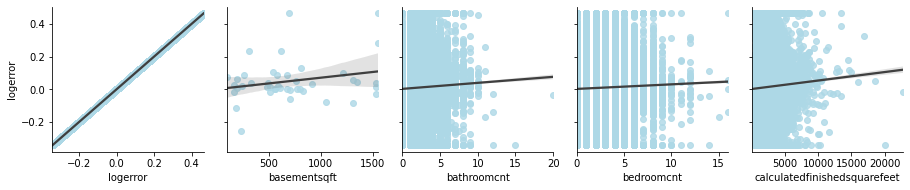

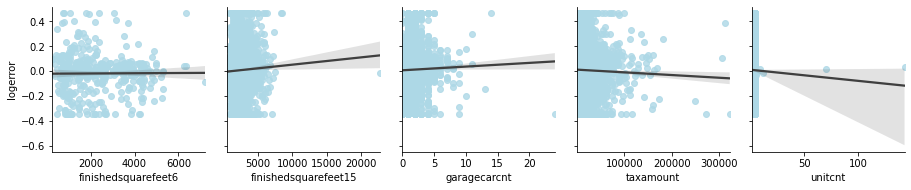

In [0]:
# Relationship between logerror and unique variables

df_train_float = df_train[["logerror","basementsqft", "bathroomcnt", "bedroomcnt", "calculatedfinishedsquarefeet", "finishedsquarefeet6", "finishedsquarefeet15", "garagecarcnt", "taxamount", "unitcnt"]]

for i in range(0, len(df_train_float.columns), 5):
    sns.pairplot(data=df_train_float,
                x_vars=df_train_float.columns[i:i+5],
                y_vars=['logerror'],
                kind="reg", plot_kws={'line_kws':{'color':'#3F3F3F'}, "scatter_kws":{"color":"lightblue"}})
    plt.show()

---
<div style="text-align: justify">From the above analysis, it was concluded that, on average, as the calculated total finished living area <i><b>(calculatedfinishedsquarefeet)</b></i> of the home increases, so does the log-error. Intuitively, this means that the Zestimate value gets far away from the true sales price. This might represent that larger homes may be more difficult to model. The same reasoning is applied to the number of bathrooms <i><b>(bathroomcnt)</b></i>, bedrooms <i><b>(bedroomcnt)</b></i> and the total area <i><b>(finishedsquarefeet50)</b></i>. Relatively to the total property tax <i><b>(taxamount) </b></i>and the number of units the structure is built into <i><b>(unitcnt)</b></i>, it has the opposite effect, as these values increase, the difference grows negatively, meaning that the Zestimate underestimates the true sales price. Again, the reasoning might be associated with the fact, that larger/richer houses, might be harder to model. It is important to highlight, that these findings, are only true, on average, <i>ceteris paribus</i>. </div>

### b) Missing Values

<div style="text-align: justify">A brief graphical representation was done, in order to assess and help the manager to better visualize how the current shape of the data is. It is clear, that there are of plenty of missing values, since, in certain columns, there are more white lines than black lines. In the chapters ahead, a more in-depth analysis is made to better verify which variables should be handled with more care. </div>

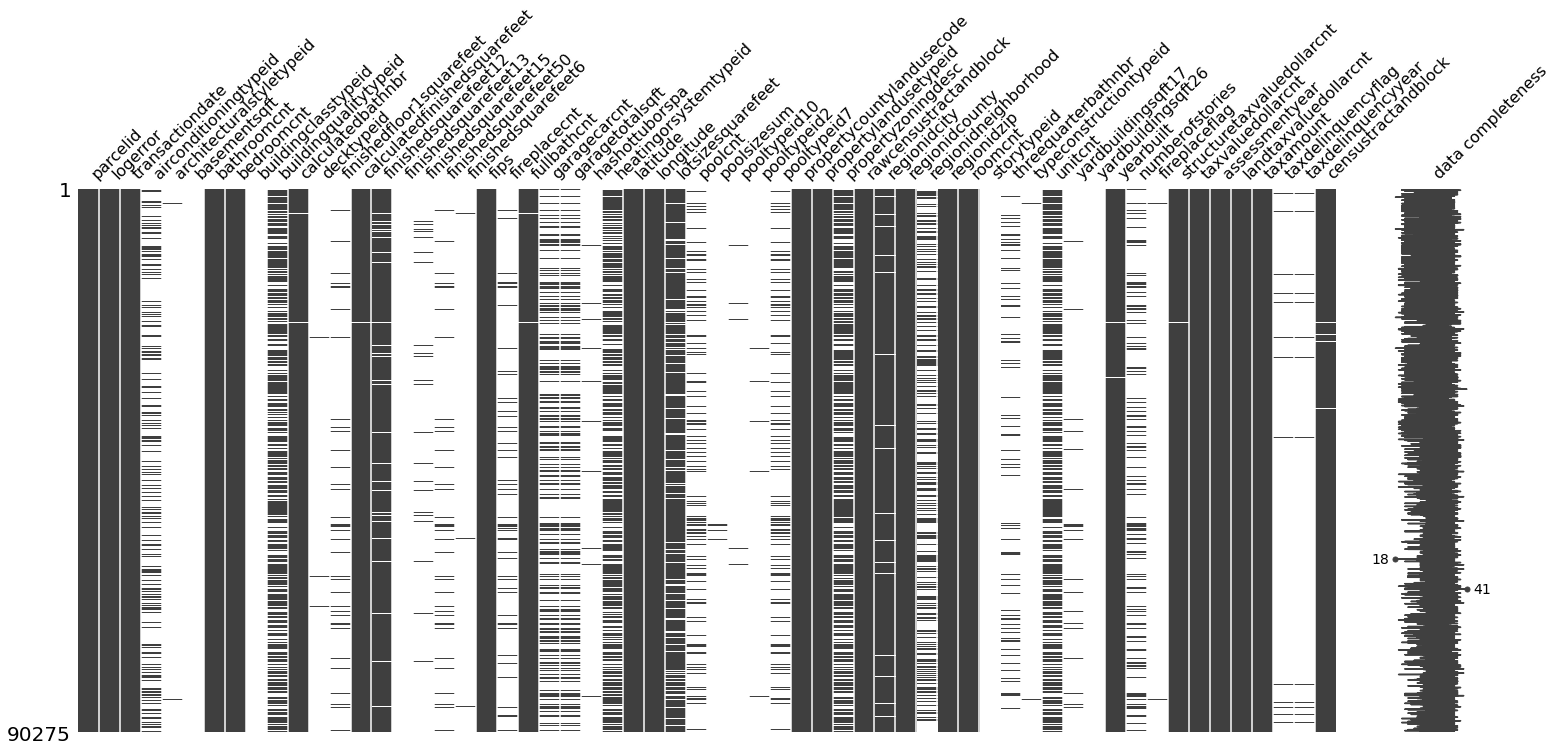

In [0]:
# Simple representation of missing values

msno.matrix(df_train, labels=True)
plt.show()

<div style="text-align: justify">Following next, a dendrogram was plotted. A dendrogram is diagram that shows the hierarchical relation between objects. It is most commonly created as an output from hierarchical clustering, and not only shows individual correlations but also the relationship between clusters. The y-axis is a measure of closeness of either individual data points or clusters. The key to interpreting a dendrogram is to focus on the height at which any two objects are joined together. In the plot below, one can see that the variables related to tax are extremely similar, as the height of the link that joins them together is the smallest. The opposite can be stated when comparing the number of stories and the garage car count. It is also relevant to mention that the clusters that have the highest dissimilarity, have on one side, the year when the property was built (<i>yearbuilt</i>), and on the other, if the house has either a hot tub or a spa (<i>hashottuborspa</i>).</div>

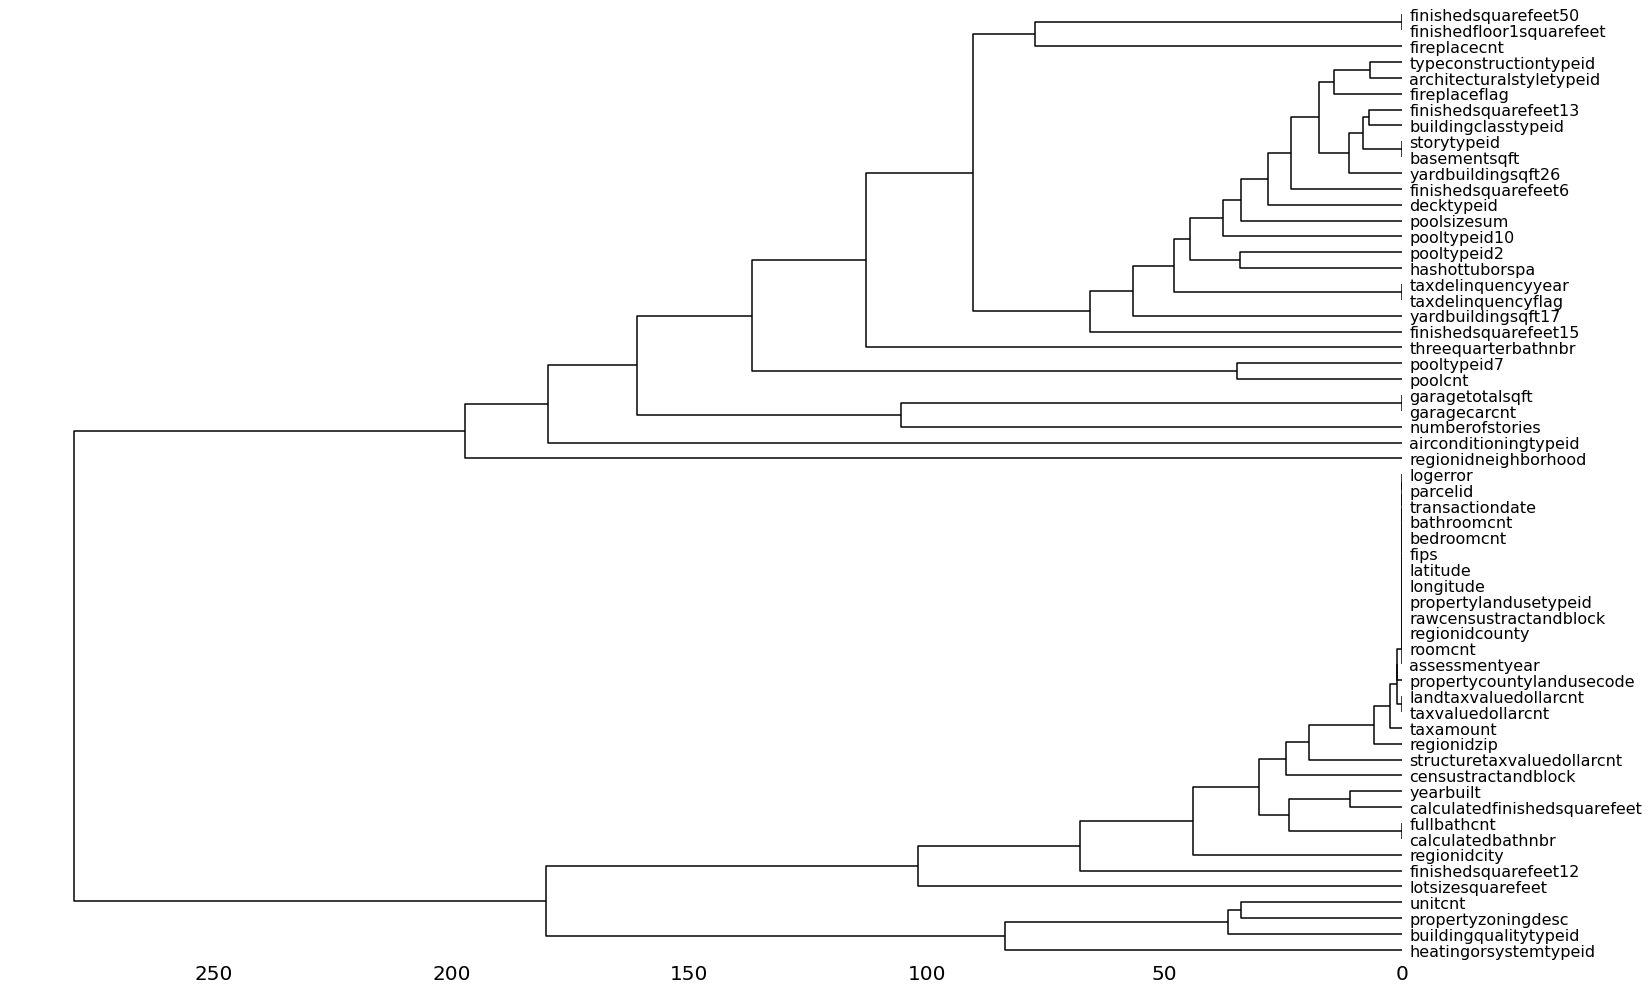

In [0]:
# Dendrogram representation

msno.dendrogram(df_train)
plt.show()

### c) Correlation Matrix

<div style="text-align: justify">In an attempt to identify interesting relationships between variables, it was built a correlation matrix, to study the behaviors between features. This approach is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. It is believed, in this case, that categorical variables are not, exactly, appropriate to be assessed by a correlation matrix, thus only the numerical variables were selected. From a sample of 90,275 observations, the variables that have unique values below 20 are really good candidates to be categorical variables. Note: One of the main features of pandas is being "NaN" friendly, therefore in this early stage of the project, there is no need to worry about it, when doing the correlation matrix!</div>

In [0]:
threshhold = 20

corr_variables = df_train.nunique().to_frame().rename(columns={0: "Number of Unique values"})
corr_variables = corr_variables[corr_variables["Number of Unique values"]<threshhold]

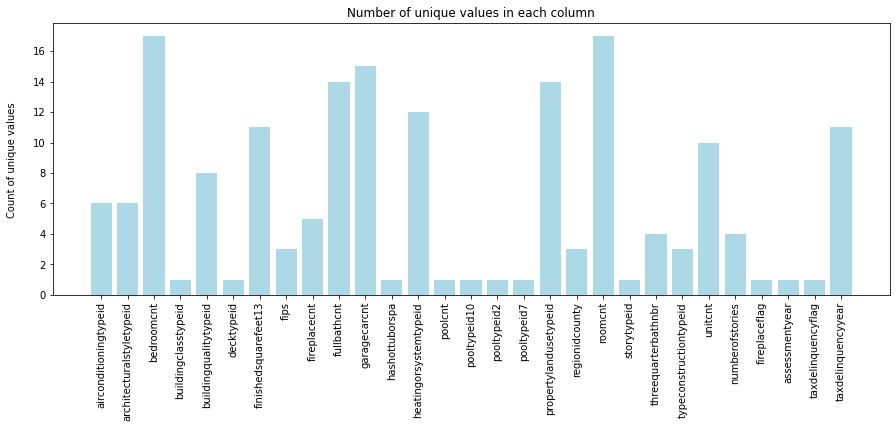

In [0]:
# Plot the Results

sep = np.arange(corr_variables.shape[0])

fig, ax = plt.subplots(figsize=(15,5))
                       
ax.bar(sep, corr_variables['Number of Unique values'].to_numpy(), color="lightblue")

ax.set_xticks(sep)
ax.set_xticklabels(corr_variables.index.values, rotation='90')
ax.set_ylabel("Count of unique values \n", rotation = "vertical")
ax.set_title("Number of unique values in each column")

plt.show()

---
<div style="text-align: justify">From the graph above, it is understood that most of the variables are categorical. This makes a good starting point. However, others do not make sense to be remove. Therefore, subjective critical thinking was applied here, in the form, that it was investigated, individually, which variables would be more suitable to be removed. A more detailed explanation is provided in the report. The list with the chosen numerical variables can be seen inside the variable: <i><b>numcols.</b></i> </div>

In [0]:
# List with Categorical Variables

catcols = ['airconditioningtypeid','architecturalstyletypeid','buildingqualitytypeid','buildingclasstypeid','decktypeid','fips','hashottuborspa','heatingorsystemtypeid','pooltypeid10','pooltypeid2','pooltypeid7','propertycountylandusecode','propertylandusetypeid','propertyzoningdesc','rawcensustractandblock','regionidcity','regionidcounty','regionidneighborhood','regionidzip','storytypeid','typeconstructiontypeid','yearbuilt','taxdelinquencyflag', "assessmentyear"]

# List with Numerical Variables for Correlation Matrix

numcols = [x for x in df_train.columns if x not in catcols]

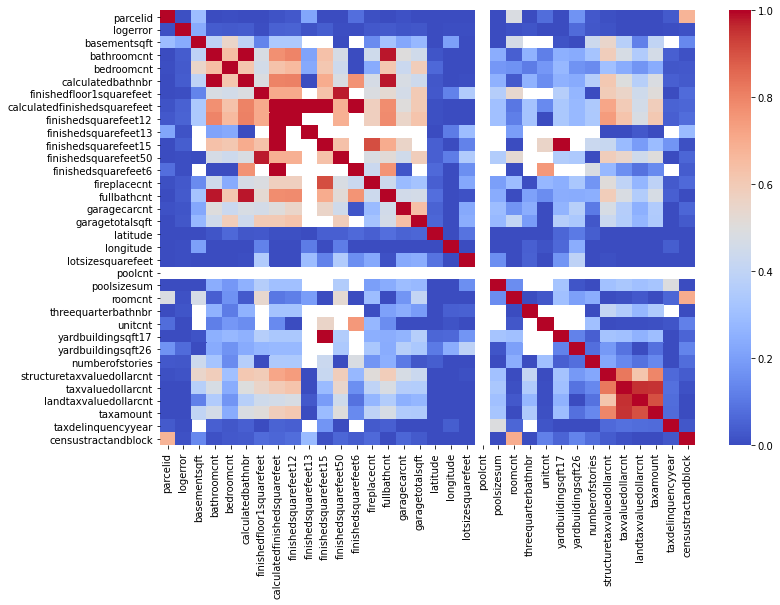

In [0]:
# Correlation Matrix

plt.figure(figsize = (12,8))
sns.heatmap(data=df_train[numcols].corr(), vmax=1, vmin=0, cmap='coolwarm')
plt.show()
#plt.gcf().clear()

---
<div style="text-align: justify">Since there were a lot of correlated variables, it was decided that the highly-correlated variables would be removed. The variables selected to be dropped are: <i>'finishedsquarefeet12', 'finishedsquarefeet6', 'finishedsquarefeet50', 'finishedsquarefeet13', 'finishedsquarefeet15', 'calculatedbathnbr', 'fullbathcnt', 'regionidcounty'</i>. The variables related to the square feet of the different divisions of the home are correlated to the square feet of the total finished living area of the home (<i>calculatedfinishedsquarefeet</i>), therefore it is reasonable to omit these variables, since <i>calculatedfinishedsquarefeet</i> already reflects most of this information. The analogous process was made to the other dropped variables. Following next, the matrix was re-checked and it was verified that the correlation matrix has a better looking shape, after the aforementioned process.</div> 

In [0]:
# Droping Highly Correlated Variables

x_train = df_train.drop(['parcelid', 'transactiondate', 'propertyzoningdesc', 'propertycountylandusecode', 'finishedsquarefeet12', 'finishedsquarefeet6', 'finishedsquarefeet50','finishedsquarefeet13', 'finishedsquarefeet15', 'calculatedbathnbr', 'fullbathcnt', 'regionidcounty'], axis=1)
y_train = df_train['logerror'].values
#print(x_train.shape, y_train.shape)

In [0]:
# Re-checking Correlations

catcols = ['fullbathcnt', 'finishedsquarefeet6', 'finishedsquarefeet50','calculatedbathnbr', 'parcelid', 'finishedsquarefeet15', 'finishedsquarefeet12', 'finishedsquarefeet13', 'transactiondate', 'logerror','airconditioningtypeid','architecturalstyletypeid','buildingqualitytypeid','buildingclasstypeid','decktypeid','fips','hashottuborspa','heatingorsystemtypeid','pooltypeid10','pooltypeid2','pooltypeid7','propertycountylandusecode','propertylandusetypeid','propertyzoningdesc','rawcensustractandblock','regionidcity','regionidcounty','regionidneighborhood','regionidzip','storytypeid','typeconstructiontypeid','yearbuilt','taxdelinquencyflag']
numcols = [x for x in df_train.columns if x not in catcols]

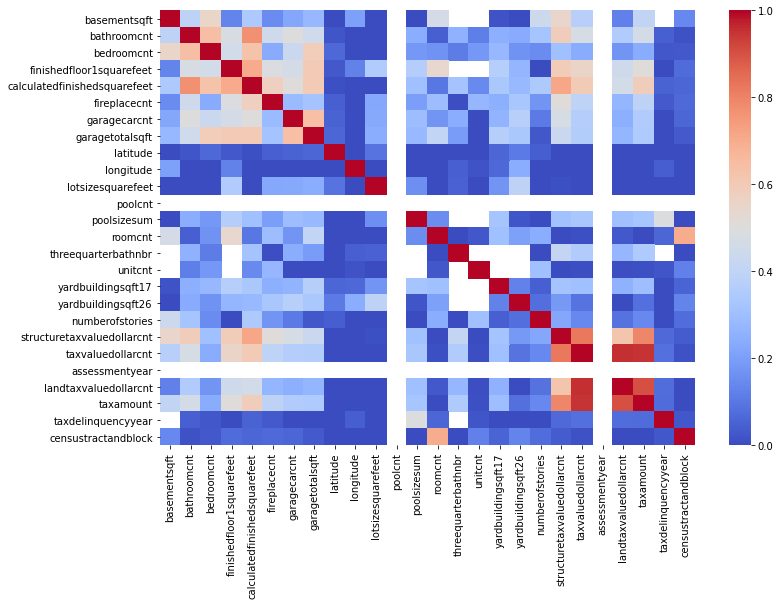

In [0]:
# Correlation Matrix

plt.figure(figsize = (12,8))
sns.heatmap(data=x_train[numcols].corr(), vmax=1, vmin=0, cmap='coolwarm')
plt.show()
#plt.gcf().clear()

<div style="text-align: justify">These Collinear features (features that are highly correlated with one another) that were dropped, will help in the construction of the final model. This, since in machine learning, these variables would lead to decreased generalization performance on the test set due to high variance and less model interpretability.  </div>

---
### d) Geographic ID's

<div style="text-align: justify">It was noticed that the dataset had a special column referring to the location of each property, <b><i>FIPS</i></b>, therefore it made sense that each number would be convert to the respective county name. This process was attained through the library - "BeautifulSoup", which made it possible to scrapple information from HTML sites, namely Wikipedia. Afterwards, the one-hot encoding method was performed. This process consists in converting categorical variables into a form that could provide ML algorithms to do a better job in predictions.  </div>

In [0]:
# Extracting table from Wikipedia

import requests
from bs4 import BeautifulSoup
website_text = requests.get('https://en.wikipedia.org/wiki/List_of_United_States_FIPS_codes_by_county').text
soup = BeautifulSoup(website_text,'lxml')

table = soup.find('table',{'class':'wikitable sortable'})
table_rows = table.find_all('tr')

data = []
for row in table_rows:
    data.append([t.text.strip() for t in row.find_all('td')])

county = pd.DataFrame(data, columns=['FIPS', 'County',"something"])
county = county.drop(columns=["something"])

# Converting FIPS to Integer

x_train["FIPS"] = x_train["fips"].astype(int)

In [0]:
#Seeing which county codes are used

county_used = x_train['FIPS'].value_counts().index.tolist()

In [0]:
# There was a mismatch between the values used in the dataframe and the ones
# in the wikipédia

county_code = []
for i in range(len(county_used)):
    county_code.append("0"+str(county_used[i]))

In [0]:
#Retrieving the county names.

county_name = []

for i in county_code:
    county_name.append(county[county["FIPS"] == i]["County"].iloc[0])

county_name

['Los Angeles County', 'Orange County', 'Ventura County']

In [0]:
# Setting-up County names based on Code

x_train['County'] = np.where(x_train['FIPS']==6037, county_name[0], 
         (np.where(x_train['FIPS']==6059, county_name[1], county_name[2])))

In [0]:
# One hot enconding for County

county_dummies = pd.get_dummies(x_train["County"])

# Converting County variables into separate columns - onehotenconding with dummies

x_train = pd.concat([x_train, county_dummies], axis=1)

x_train = x_train.drop(columns=['County'])
x_train.head()

,logerror,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,decktypeid,finishedfloor1squarefeet,...,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,FIPS,Los Angeles County,Orange County,Ventura County
0,0.0276,1.0,NaN,NaN,2.0,3.0,NaN,4.0,NaN,NaN,...,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13,6037,1,0,0
1,-0.1684,NaN,NaN,NaN,3.5,4.0,NaN,NaN,NaN,NaN,...,2015.0,239071.0,10153.02,NaN,NaN,NaN,6059,0,1,0
2,-0.0040,1.0,NaN,NaN,3.0,2.0,NaN,4.0,NaN,NaN,...,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13,6037,1,0,0
3,0.0218,1.0,NaN,NaN,2.0,2.0,NaN,4.0,NaN,NaN,...,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13,6037,1,0,0
4,-0.0050,NaN,NaN,NaN,2.5,4.0,NaN,NaN,NaN,NaN,...,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13,6059,0,1,0


In [0]:
# Dropping unnecessary variables

x_train = x_train.drop(columns=["FIPS", "fips", "regionidcity", "regionidzip"])

### e) Creating Feature Venues

<div style="text-align: justify">In this section, it was defined the creation of a new variable, <i><b>Venues</b></i>. The idea consisted in, for each observation, using the Foursquare API, to retrieve the venues that would better describe the region where each particular property was located. After that a clustering was made, in order to group similar properties in terms of what they have nearby. Since, the Foursquare API is paid, it was necessary to create different accounts, to generate 20 times, a random sample of 500 observations, each one with 10 venues. After this process, the 20 csvs were grouped in one, which can be seen at venues.csv. The code below, is just to represent what was done 20 times.</div>

In [0]:
CLIENT_ID = 'HVGIUTKYRUZHDT1MNCS3A0GDQI1EQS41GDKBMCBMUBBG4N0U' # your Foursquare ID
CLIENT_SECRET = '01GZ4DILXQRRMS2RLQW1WWZ2GQ2Y24XHQBY54SQ43TMOMLXT' # your Foursquare Secret
VERSION = '20180323' # Foursquare API version

In [0]:
# Based on description, longitude and latitude are multiplied by 10^E6 (Scientific Notation)

df_train['longitude'] = df_train['longitude']/1000000
df_train['latitude'] = df_train['latitude']/1000000

In [0]:
zz = df_train.sample(n=500)

In [0]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=10):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['parcelid', 
                  'parcelid Latitude', 
                  'parcelid Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [0]:
downtown_venues = getNearbyVenues(names=zz['parcelid'],
                                   latitudes=zz['latitude'],
                                   longitudes=zz['longitude'])


In [0]:
venue_1000 = downtown_venues[["parcelid", "Venue Category"]]

In [0]:
# Converting Dataframe to csv

venue_1000.to_csv("first2.csv", index=False)

<div style="text-align: justify">From the multiple csvs that were created with random observations, it became possible to be aggregated, and it can be seen in venues.csv. Afterwards, it was feasible to see each venue’s individual contribution to the importance, for each observation. For example, if a certain parcelid yields three venues, and there are two of them representing coffee shops, then this venue will have a relative weight of 2/3. Then, these findings were simply translated into the most common venues per observation. A cluster analysis was run to attain the group of observations that were similar between themselves.</div>

In [0]:
url = "venues.csv"

downtown_venues = pd.read_csv(url)

In [0]:
downtown_venues = downtown_venues.drop_duplicates(keep=False)

In [0]:
# one hot encoding
manhattan_onehot = pd.get_dummies(downtown_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['parcelid'] = downtown_venues['parcelid'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

,parcelid,ATM,Accessories Store,Acupuncturist,Adult Boutique,Advertising Agency,Afghan Restaurant,African Restaurant,Airport,Airport Food Court,...,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,10784151,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10784151,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12496976,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12496976,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12496976,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
manhattan_grouped = manhattan_onehot.groupby('parcelid').mean().reset_index()
manhattan_grouped.head()

,parcelid,ATM,Accessories Store,Acupuncturist,Adult Boutique,Advertising Agency,Afghan Restaurant,African Restaurant,Airport,Airport Food Court,...,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,10712086,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10713921,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10714158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10714463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10715028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [0]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['parcelid']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['parcelid'] = manhattan_grouped['parcelid']

for ind in np.arange(manhattan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,parcelid,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,10712086,Park,Zoo Exhibit,English Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Fabric Shop,Fair
1,10713921,Electronics Store,Home Service,Construction & Landscaping,Park,Zoo Exhibit,Fabric Shop,Farmers Market,Farm,Falafel Restaurant,Fair
2,10714158,Arcade,Playground,Hardware Store,Music Venue,Furniture / Home Store,Fair,Field,Fast Food Restaurant,Farmers Market,Farm
3,10714463,Arcade,Convenience Store,Music Venue,Restaurant,Lawyer,Fair,Field,Fast Food Restaurant,Farmers Market,Farm
4,10715028,Construction & Landscaping,Zoo Exhibit,Fabric Shop,Field,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Fair,Eye Doctor
...,...,...,...,...,...,...,...,...,...,...,...
7598,17300210,Construction & Landscaping,Scenic Lookout,River,Zoo Exhibit,Eye Doctor,Farmers Market,Farm,Falafel Restaurant,Fair,Fabric Shop
7599,93577062,Donut Shop,Zoo Exhibit,Filipino Restaurant,Entertainment Service,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Fabric Shop
7600,162960603,Breakfast Spot,Karaoke Bar,Deli / Bodega,Diner,Music Venue,Mexican Restaurant,Gym,Vietnamese Restaurant,Rental Car Location,Japanese Restaurant
7601,162960704,Chinese Restaurant,Restaurant,Taco Place,Food & Drink Shop,Zoo Exhibit,Eye Doctor,Farmers Market,Farm,Falafel Restaurant,Fair


In [0]:
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 5

manhattan_grouped_clustering = manhattan_grouped.drop('parcelid', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [0]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

manhattan_merged = df_train

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
manhattan_merged = manhattan_merged.join(neighborhoods_venues_sorted.set_index('parcelid'), on='parcelid')

In [0]:
manhattan_merged["Cluster Labels"].value_counts() # check the last columns!

1.0    6084
0.0     986
4.0     290
3.0     162
2.0      99
Name: Cluster Labels, dtype: int64

In [0]:
x_train["Cluster Labels"] = manhattan_merged["Cluster Labels"]

In [0]:
venue_update = x_train[["Cluster Labels", "longitude", "latitude"]]

imputer = KNNImputer(n_neighbors=1)

df_filled = imputer.fit_transform(venue_update)

In [0]:
df_sf = pd.DataFrame(df_filled)

In [0]:
x_train["Cluster Labels"] = df_sf[0]

In [0]:
venues_onehot = pd.get_dummies(x_train['Cluster Labels'], prefix="", prefix_sep="")

In [0]:
x_train["Venue 0"] = venues_onehot["0.0"]
x_train["Venue 1"] = venues_onehot["1.0"]
x_train["Venue 2"] = venues_onehot["2.0"]
x_train["Venue 3"] = venues_onehot["3.0"]
x_train["Venue 4"] = venues_onehot["4.0"]
x_train = x_train.drop(["Cluster Labels"], axis=1)

In [0]:
x_train.head()

,logerror,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,decktypeid,finishedfloor1squarefeet,...,taxdelinquencyyear,censustractandblock,Los Angeles County,Orange County,Ventura County,Venue 0,Venue 1,Venue 2,Venue 3,Venue 4
0,0.0276,1.0,NaN,NaN,2.0,3.0,NaN,4.0,NaN,NaN,...,NaN,6.037107e+13,1,0,0,0,1,0,0,0
1,-0.1684,NaN,NaN,NaN,3.5,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0,1,0,0,1,0,0,0
2,-0.0040,1.0,NaN,NaN,3.0,2.0,NaN,4.0,NaN,NaN,...,NaN,6.037464e+13,1,0,0,1,0,0,0,0
3,0.0218,1.0,NaN,NaN,2.0,2.0,NaN,4.0,NaN,NaN,...,NaN,6.037296e+13,1,0,0,0,1,0,0,0
4,-0.0050,NaN,NaN,NaN,2.5,4.0,NaN,NaN,NaN,NaN,...,NaN,6.059042e+13,0,1,0,0,0,0,0,1


### e) Dealing with Missing Values - Feature Selection

<div style="text-align: justify">In previous chapters, it was seen that the data had a lot of missing values. Datasets can have missing values for a number of reasons such as observations that were not recorded and data corruption. Handling missing data is extremely important as many machine learning algorithms do not support data with missing values. Based on this exploratory analysis and the number of missing values, the first step in tackling NaN's was to exclude some of the features, in order to continue with the on-going analysis to have a cleaner dataset. In this specific case, the features that have more than a certain percentage of missing values, should be excluded, because it is likely that these variables will not bring any value added to the explanation of the log-error. As a rule of thumb, when the data is missing on more than 50%, dropping the variable should be considered, and that is exactly what is done in the following lines of code.

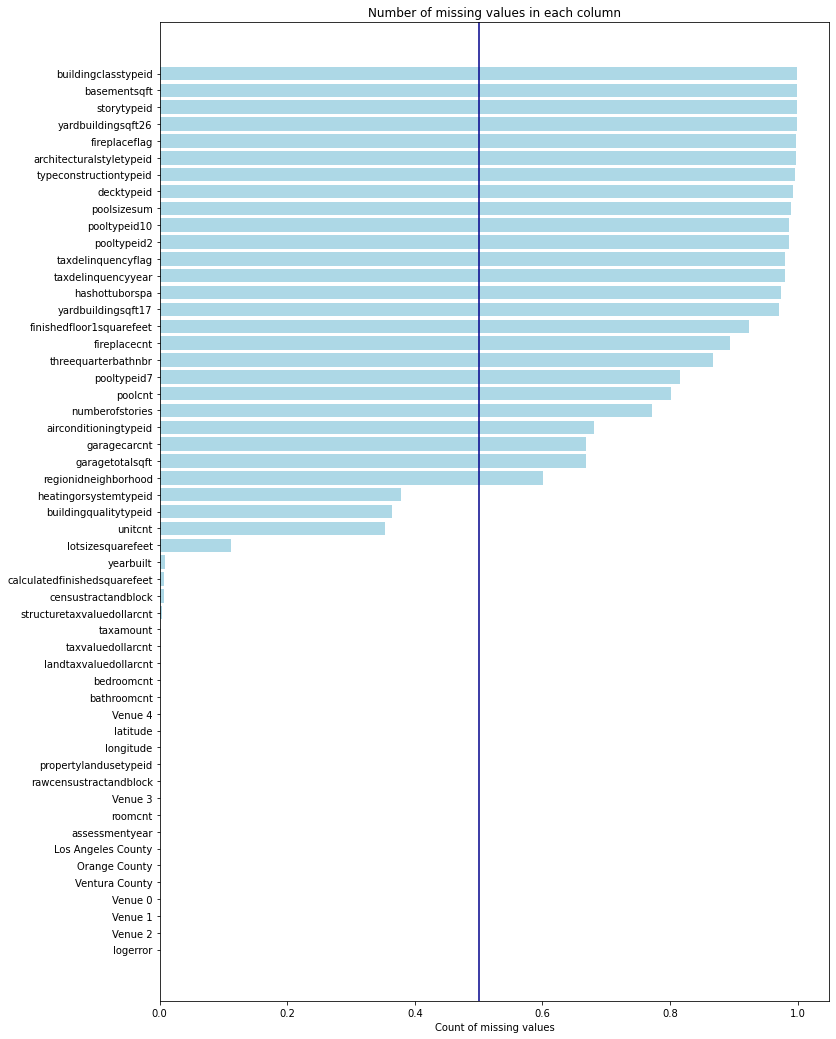

In [0]:
#Computing missing values

missing_df = x_train.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.sort_values(by='missing_count')

# Plot the Results

ind = np.arange(missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_df.missing_count.values/df_train.shape[0], color='lightblue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")

ax.axvline(0.5, color="darkblue")
plt.show()

In [0]:
# Getting the percentage of missing values

missing_df["missing_percentage"] = missing_df["missing_count"]/df_train.shape[0]

In [0]:
# Dropping variables that have more than 50% missing values

new_features = missing_df[missing_df["missing_percentage"] <0.5]
x_features = new_features["column_name"].tolist()

In [0]:
# Our explanatory variables

new_features

,column_name,missing_count,missing_percentage
0,logerror,0,0.000000
50,Venue 2,0,0.000000
49,Venue 1,0,0.000000
48,Venue 0,0,0.000000
47,Ventura County,0,0.000000
46,Orange County,0,0.000000
45,Los Angeles County,0,0.000000
39,assessmentyear,0,0.000000
27,roomcnt,0,0.000000
51,Venue 3,0,0.000000


In [0]:
MODEL = x_train[x_features]

In [0]:
# Converting to float32 so that it is easier to Train the Model

for c, dtype in zip(MODEL.columns, MODEL.dtypes):
    if dtype == np.float64:
        MODEL[c] = MODEL[c].astype(np.float32)

### f) Dealing with Missing Values - Estimating Values

<div style="text-align: justify">As previously said, handling missing data is extremely important! After dropping some of the unnecessary features, there are plenty of approaches to solve the remaining missing values. One can replace the NaN's with:</div>

<left>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- A constant value that has meaning within the domain;</left>

<left>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- A value from another randomly selected record;</left>

<left>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- A mean, median or mode value for the column;</left>

<left>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>- A value estimated by another predictive model.</b></left>
<br>
<br>
<div style="text-align: justify">It was decided that it made more sense to use another predictive model to estimate the missing values. To achieve this, the KNN Imputer was used. The process is as follows: each sample’s missing values are imputed using the mean value from n_neighbors nearest neighbors found in the training set. Two samples are close if the features that neither is missing are close. In the next lines, this method is executed for the following features: <i>structuretaxvaluedollarcnt, buildingtype, unitcnt, yearbuilt and lotsizesquarefeet, heatingsystem</i> and<i> calculatedfinishedsquarefeet</i>.</div>

<br></br>
> - ### KNN Inputer - structuretaxvaluedollarcnt

<div style="text-align: justify">The K-nearest neighbors regressor is used in this context to replace the missing values in column <i>structuretaxvaluedollarcnt</i> by clustering values that are near to these NaN's. Clusters were created through <i>taxvaluedollarcnt</i>, due to its high correlation with the variable in question. The assumption behind using KNN for missing values is that a point value can be approximated by the values of the points that are closest to it, based on other variables.</div>

In [0]:
# Taxvaluedollarcnt is the variable that its the most correlated with structuretaxvaleudollarcnt

tax = MODEL[["landtaxvaluedollarcnt", "taxvaluedollarcnt", "taxamount", "structuretaxvaluedollarcnt"]]
x =  tax.corr()
print(x.structuretaxvaluedollarcnt.sort_values(ascending = False))

structuretaxvaluedollarcnt    1.000000
taxvaluedollarcnt             0.826052
taxamount                     0.795014
landtaxvaluedollarcnt         0.623292
Name: structuretaxvaluedollarcnt, dtype: float64


In [0]:
# Replacing Missing Values using the KNN Imputer

tax_update = MODEL[["taxvaluedollarcnt", "structuretaxvaluedollarcnt"]]

imputer = KNNImputer(n_neighbors=1)

df_filled = imputer.fit_transform(tax_update)
df_tax= pd.DataFrame(df_filled).rename(columns={1:"structuretaxvaluedollarcnt"})

In [0]:
# Adding the new column to the dataset

MODEL= pd.merge(MODEL, df_tax["structuretaxvaluedollarcnt"])

<br></br>
> - ### KNN Inputer - buildingtype, unitcnt, yearbuilt and lotsizesquarefeet

<div style="text-align: justify">The K-nearest neighbors regressor is used in this context to replace the missing values in columns <i> buildingtype, unitcnt, yearbuilt and lotsizesquarefeet</i> by clustering values that are near to these NaN's. Clusters were created through geo-localization, through latitude and longitude values. The assumption behind using KNN for missing values is that a point value can be approximated by the values of the points that are closest to it, based on other variables.</div>

In [0]:
# List of Variables with Missing Values

columns_KNN = ["buildingqualitytypeid", 'unitcnt','yearbuilt', 'lotsizesquarefeet']

In [0]:
# Replacing Missing Values using the KNN Imputer - Building Quality ID

building_update = MODEL[["latitude", "longitude", "buildingqualitytypeid"]]

imputer = KNNImputer(n_neighbors=1)

df_filled = imputer.fit_transform(building_update)
building_unit= pd.DataFrame(df_filled).rename(columns={2:"buildingqualitytypeid"})

In [0]:
# Replacing Missing Values using the KNN Imputer - Unit Count

unit_update = MODEL[["latitude", "longitude", "unitcnt"]]

imputer = KNNImputer(n_neighbors=1)

df_filled = imputer.fit_transform(unit_update)
unit_unit= pd.DataFrame(df_filled).rename(columns={2:"unitcnt"})

In [0]:
# Replacing Missing Values using the KNN Imputer - Year Built

year_update = MODEL[["latitude", "longitude", "yearbuilt"]]

imputer = KNNImputer(n_neighbors=1)

df_filled = imputer.fit_transform(year_update)
year_unit= pd.DataFrame(df_filled).rename(columns={2:"yearbuilt"})

In [0]:
# Replacing Missing Values using the KNN Imputer - Size Square Per Feet

sqr_update = MODEL[["latitude", "longitude", "lotsizesquarefeet"]]

imputer = KNNImputer(n_neighbors=1)

df_filled = imputer.fit_transform(sqr_update)
sqr_unit= pd.DataFrame(df_filled).rename(columns={2:"lotsizesquarefeet"})

In [0]:
# Dropping Unnecessary Columns

FINAL = MODEL.drop(columns = columns_KNN)

In [0]:
# Adding New Columns to the whole Dataset

FINAL["buildingqualitytypeid"] = building_unit["buildingqualitytypeid"]
FINAL["unitcnt"] = unit_unit["unitcnt"]
FINAL["yearbuilt"] = year_unit["yearbuilt"]
FINAL["lotsizesquarefeet"] = sqr_unit["lotsizesquarefeet"]

In [0]:
FINAL.head()

,logerror,Venue 2,Venue 1,Venue 0,Ventura County,Orange County,Los Angeles County,assessmentyear,roomcnt,Venue 3,...,taxvaluedollarcnt,taxamount,structuretaxvaluedollarcnt,censustractandblock,calculatedfinishedsquarefeet,heatingorsystemtypeid,buildingqualitytypeid,unitcnt,yearbuilt,lotsizesquarefeet
0,0.0276,0,1,0,0,0,1,2015.0,0.0,0,...,360170.0,6735.879883,122754.0,6.037107e+13,1684.0,2.0,4.0,1.0,1959.0,7528.0
1,-0.1684,0,1,0,0,1,0,2015.0,0.0,0,...,585529.0,10153.019531,346458.0,NaN,2263.0,NaN,4.0,4.0,2014.0,3643.0
2,-0.0040,0,0,1,0,0,1,2015.0,0.0,0,...,119906.0,11484.480469,61994.0,6.037464e+13,2217.0,2.0,4.0,1.0,1940.0,11423.0
3,-0.0040,0,0,1,0,0,1,2015.0,0.0,0,...,119906.0,11484.480469,61994.0,6.037464e+13,2217.0,2.0,4.0,1.0,1940.0,11423.0
4,-0.0040,0,0,1,0,0,1,2015.0,0.0,0,...,119906.0,11484.480469,61994.0,6.037464e+13,2217.0,2.0,4.0,1.0,1940.0,11423.0


<div style="text-align: justify">Below, it was simply exported the last dataframe into excel, so that the code was easier to run onwards, without demanding the necessary computational power needed to run the previous lines of code. This idea was extremely efficient, not only in terms of time, but also in the created synergies that it enabled, being all group-members able to work in different parts on the project. </div>

In [0]:
# Convert Dataframe to csv

FINAL.to_csv("output_preliminary.csv", index=False)

In [0]:
# Importing csv file

url = "output_preliminary.csv"
newMODEL = pd.read_csv(url)

<br></br>
> - ### KNN Inputer - heatingsystem

<div style="text-align: justify">The K-nearest neighbors regressor is used in this context to replace the missing values in column <i>heatingsystem</i> by clustering values that are near to these NaN's. Clusters are created through the location of the county, whether if it is Ventura, Los Angeles or Orange County. Also by using the number of rooms and it's geo-localization. The reasoning behind the choice of these variables, is that the heating system may be influenced by the location of the house, due to, for example, the weather, and the number of rooms. Since more division might imply richer houses, therefore it is more likely that a more sophisticated heating system may be employed. The assumption behind using KNN for missing values is that a point value can be approximated by the values of the points that are closest to it, based on other variables.</div>

In [0]:
# Variables That Will Explain Heating System ID

heating = newMODEL[["heatingorsystemtypeid", "Ventura County", "Los Angeles County","Orange County","roomcnt", 'latitude', "longitude"]]

In [0]:
# Replacing Missing Values using the KNN Imputer - Heating System ID

imputer = KNNImputer(n_neighbors=1)

df_filled = imputer.fit_transform(heating)
df_heating= pd.DataFrame(df_filled)

In [0]:
# Adding the New Column to the Dataset

newMODEL["heatingorsystemtypeid"] = df_heating[0]

In [0]:
# Converting Categorical Variables into Numerical

newMODEL["heatingsystem"] = np.where(newMODEL['heatingorsystemtypeid']==13.0, 0, 1) # 0 => NO and 1=> YES
newMODEL = newMODEL.drop(columns=["heatingorsystemtypeid"])

In [0]:
newMODEL.head()

,logerror,Venue 2,Venue 1,Venue 0,Ventura County,Orange County,Los Angeles County,assessmentyear,roomcnt,Venue 3,...,taxvaluedollarcnt,taxamount,structuretaxvaluedollarcnt,censustractandblock,calculatedfinishedsquarefeet,buildingqualitytypeid,unitcnt,yearbuilt,lotsizesquarefeet,heatingsystem
0,0.0276,0,1,0,0,0,1,2015.0,0.0,0,...,360170.0,6735.88,122754.0,6.037107e+13,1684.0,4.0,1.0,1959.0,7528.0,1
1,-0.1684,0,1,0,0,1,0,2015.0,0.0,0,...,585529.0,10153.02,346458.0,NaN,2263.0,4.0,4.0,2014.0,3643.0,0
2,-0.0040,0,0,1,0,0,1,2015.0,0.0,0,...,119906.0,11484.48,61994.0,6.037464e+13,2217.0,4.0,1.0,1940.0,11423.0,1
3,-0.0040,0,0,1,0,0,1,2015.0,0.0,0,...,119906.0,11484.48,61994.0,6.037464e+13,2217.0,4.0,1.0,1940.0,11423.0,1
4,-0.0040,0,0,1,0,0,1,2015.0,0.0,0,...,119906.0,11484.48,61994.0,6.037464e+13,2217.0,4.0,1.0,1940.0,11423.0,1


<br></br>
> - ### KNN Inputer - calculatedfinishedsquarefeet

<div style="text-align: justify">Here, it is been using, again, the K nearest neighbors regressor using the number of bathroom, bedrooms (as more bathrooms and bedrooms means bigger the area) and <i>structuretaxvaluedollarcnt</i> (as we are assuming the size of the property has an impact on the tax), to find important relationships on <i>calculatedfinishedsquarefeet</i>. The assumption behind using KNN for missing values is that a point value can be approximated by the values of the points that are closest to it, based on other variables.</div>

In [0]:
# Variables That Will Explain Calculated Finished Square Feet

squarefeet = newMODEL[["calculatedfinishedsquarefeet","bathroomcnt", "bedroomcnt" ,"roomcnt", "structuretaxvaluedollarcnt"]]

In [0]:
# Replacing Missing Values using the KNN Imputer - Calculated Finished Square Feet

imputer = KNNImputer(n_neighbors=1)

df_filled = imputer.fit_transform(squarefeet)
df_squarefeet= pd.DataFrame(df_filled)

In [0]:
# Adding the New Column to the Dataset

newMODEL["calculatedfinishedsquarefeet"] = df_squarefeet[0]
newMODEL.head()

,logerror,Venue 2,Venue 1,Venue 0,Ventura County,Orange County,Los Angeles County,assessmentyear,roomcnt,Venue 3,...,taxvaluedollarcnt,taxamount,structuretaxvaluedollarcnt,censustractandblock,calculatedfinishedsquarefeet,buildingqualitytypeid,unitcnt,yearbuilt,lotsizesquarefeet,heatingsystem
0,0.0276,0,1,0,0,0,1,2015.0,0.0,0,...,360170.0,6735.88,122754.0,6.037107e+13,1684.0,4.0,1.0,1959.0,7528.0,1
1,-0.1684,0,1,0,0,1,0,2015.0,0.0,0,...,585529.0,10153.02,346458.0,NaN,2263.0,4.0,4.0,2014.0,3643.0,0
2,-0.0040,0,0,1,0,0,1,2015.0,0.0,0,...,119906.0,11484.48,61994.0,6.037464e+13,2217.0,4.0,1.0,1940.0,11423.0,1
3,-0.0040,0,0,1,0,0,1,2015.0,0.0,0,...,119906.0,11484.48,61994.0,6.037464e+13,2217.0,4.0,1.0,1940.0,11423.0,1
4,-0.0040,0,0,1,0,0,1,2015.0,0.0,0,...,119906.0,11484.48,61994.0,6.037464e+13,2217.0,4.0,1.0,1940.0,11423.0,1


### g) Exporting DataFrame

<div style="text-align: justify">In this section, the last data frame was exported into excel, so that the code was easier to run onwards, without demanding the necessary computational power to run the previous lines of code. This idea was extremely efficient, not only in terms of time, but also in the created synergies that enable, being all group-members able to work in different parts on the project. </div>

In [0]:
# Converting Dataframe to csv

newMODEL.to_csv("output1.csv", index=False)

In [0]:
# Importing csv file

url = "output1.csv"
newMODEL = pd.read_csv(url)

---
### h) Dealing with Missing Values - Final Step

<div style="text-align: justify">In this step, it was understood that the remaining missing values were approximately 0.3% of all entries. It was realized that this behavior is not the most accurate in terms of data cleaning, however it is believed that by removing these entries, the influence that it will have in the final model, and its predictability is going to be extrememely low. Besides, as seen in the early stages of EDA, the variable <i>censustractandblock</i> is not, actually, extremely important when assessing its direct impact on log-error, therefore it was concluded that this method is reasonable and effective.</div>

In [0]:
# Assessing Missing Values

missing_df = newMODEL.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.sort_values(by='missing_count')
missing_df["missing_percentage"] = missing_df["missing_count"]/newMODEL.shape[0]

In [0]:
missing_df

,column_name,missing_count,missing_percentage
0,logerror,0,0.000000
25,yearbuilt,0,0.000000
24,unitcnt,0,0.000000
23,buildingqualitytypeid,0,0.000000
22,calculatedfinishedsquarefeet,0,0.000000
20,structuretaxvaluedollarcnt,0,0.000000
18,taxvaluedollarcnt,0,0.000000
17,landtaxvaluedollarcnt,0,0.000000
16,bedroomcnt,0,0.000000
15,bathroomcnt,0,0.000000


In [0]:
# Removing Observations with Missing Values

newMODEL = newMODEL[newMODEL['censustractandblock'].notna()]
newMODEL = newMODEL[newMODEL['taxamount'].notna()]

In [0]:
# Setting Independent and Explanatory Variables

y = newMODEL['logerror'].values
X = newMODEL.loc[:, newMODEL.columns != 'logerror']

In [0]:
print(y.shape[0], X.shape[0])

532116 532116


In [0]:
# Assessing One More Time the Missing Values

missing_df = X.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.sort_values(by='missing_count')
missing_df["missing_percentage"] = missing_df["missing_count"]/X.shape[0]
missing_df

,column_name,missing_count,missing_percentage
0,Venue 2,0,0.0
24,yearbuilt,0,0.0
23,unitcnt,0,0.0
22,buildingqualitytypeid,0,0.0
21,calculatedfinishedsquarefeet,0,0.0
20,censustractandblock,0,0.0
19,structuretaxvaluedollarcnt,0,0.0
18,taxamount,0,0.0
17,taxvaluedollarcnt,0,0.0
16,landtaxvaluedollarcnt,0,0.0


## 6. Modeling

<div style="text-align: justify">Once the data was gathered, it was necessary to proceed with data modeling. For this, the modeling algorithm to better suit the data needs to be selected. The first attempt was with XGBoost. According to the documentation, this algorithm is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework.
<br><br>
Firstly, the dataset is divided in train and test sets. Besides, the XGBoost matrices are built, so that the data is structured in a way that XGBoost is able to support.</div>

In [0]:
import xgboost as xgb

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

<div style="text-align: justify">A dictionary with the hyperparameters to tune is bulit. Our best guess was built based on industry standards.</div>

In [0]:
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
}


params['eval_metric'] = "mae"

num_boost_round = 999



<div style="text-align: justify">In first place, the xgb model was trained on the train set, inputting the parametes established before and setting an early stopping if the MAE in the test set had not improved for 10 rounds.</div>

In [0]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[17:07:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:0.345306
Will train until Test-mae hasn't improved in 10 rounds.
[1]	Test-mae:0.246598
[2]	Test-mae:0.179674
[3]	Test-mae:0.13494
[4]	Test-mae:0.105428
[5]	Test-mae:0.086665
[6]	Test-mae:0.075137
[7]	Test-mae:0.068324
[8]	Test-mae:0.064444
[9]	Test-mae:0.062187
[10]	Test-mae:0.06087
[11]	Test-mae:0.059976
[12]	Test-mae:0.05945
[13]	Test-mae:0.059072
[14]	Test-mae:0.058883
[15]	Test-mae:0.058607
[16]	Test-mae:0.058375
[17]	Test-mae:0.058211
[18]	Test-mae:0.058027
[19]	Test-mae:0.057854
[20]	Test-mae:0.057741
[21]	Test-mae:0.057645
[22]	Test-mae:0.057492
[23]	Test-mae:0.057427
[24]	Test-mae:0.057307
[25]	Test-mae:0.057245
[26]	Test-mae:0.057124
[27]	Test-mae:0.056934
[28]	Test-mae:0.056862
[29]	Test-mae:0.056816
[30]	Test-mae:0.056661
[31]	Test-mae:0.056502
[32]	Test-mae:0.056433
[33]	Test-mae:0.056249
[34]	Test-mae:0.056167
[35]	Test-mae:0.056043
[36]	Test-mae

<div style="text-align: justify">A feature importance analysis was conducted to assess which variables, under the metric: Gain. This importance type measures the improvement in accuracy, brought by a feature, to the branches it is on - the average gain across all splits the feature is used in.</div>

In [0]:
# Feature Importance

feat_imp = model.get_score(fmap='', importance_type='gain')

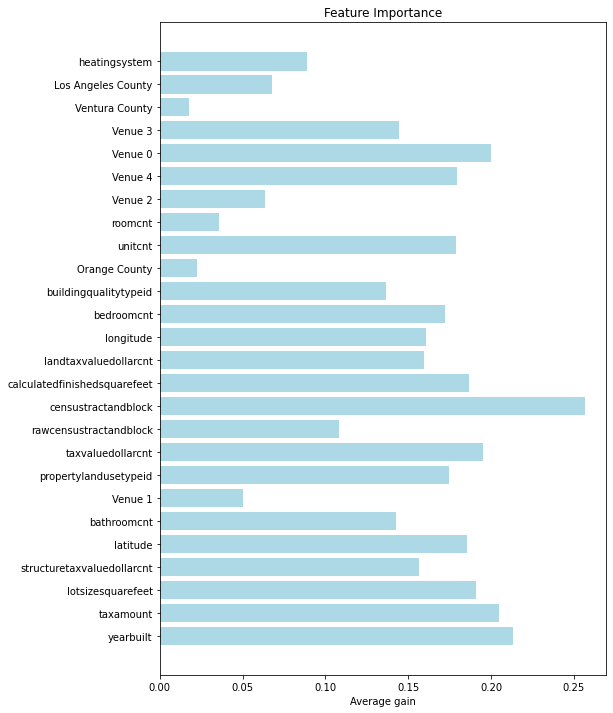

In [0]:
# Plotting the findings from feature importance

ind1 = np.arange(len(feat_imp))

fig, ax = plt.subplots(figsize=(8,12))
rects = ax.barh(ind1, feat_imp.values(), color='lightblue')
ax.set_yticks(ind1)
ax.set_yticklabels(feat_imp.keys(), rotation='horizontal')
ax.set_xlabel("Average gain")
ax.set_title("Feature Importance")

plt.show()

<div style="text-align: justify">Since XGBoost is prone to overfitting, it is a good practice to cross validate the model. The mean absolute error (MAE) is going to be used to evaluate the quality of the predictions. MAE is a common and simple metric that has the advantage of being in the same unit as our target, which means it can be compared to target values and easily interpreted.</div>

In [0]:
#Early stopping at round 417

#Cross validation

cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'mae'},
    early_stopping_rounds=10
)
cv_results

[17:19:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:19:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:19:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:19:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:19:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
0,0.345610,0.000059,0.345630,0.000312
1,0.246790,0.000046,0.246840,0.000319
2,0.179691,0.000030,0.179753,0.000288
3,0.134795,0.000071,0.134888,0.000293
4,0.105233,0.000080,0.105340,0.000289
...,...,...,...,...
994,0.024524,0.007665,0.027872,0.006849
995,0.024515,0.007670,0.027865,0.006852
996,0.024507,0.007674,0.027859,0.006855
997,0.024499,0.007678,0.027853,0.006858


In [0]:
cv_results['test-mae-mean'].min()

0.027848

<div style="text-align: justify">The best result is obtained for 491 rounds with a MAE of 0.0432454 in the test set.</div>

**Hyperparameters tuning**

<div style="text-align: justify">The next step consists in finetuning the hyperparameters in the dictionary using cross validation trials. The next hyperparameters are critical to achieve high performance and hence, are going to be the core of the grid search:</div>

<div style="text-align: justify">
    
*   **max_depth** is the maximum number of nodes allowed from the root to the farthest leaf of a tree. Deeper trees can model more complex relationships by adding more nodes, but as one goes deeper, splits become less relevant and are sometimes only due to noise, causing the model to overfit.
    
*   **min_child_weight** is the minimum weight (or number of samples if all samples have a weight of 1) required to create a new node in the tree. A smaller min_child_weight allows the algorithm to create children that correspond to fewer samples, thus allowing for more complex trees, but again, more likely to overfit.
</div>

In [0]:
# Hyperparameters gridsearch

gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(7, 12, 2)
    for min_child_weight in range(3, 8, 2)
]

In [0]:
min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best MAE
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with max_depth=7, min_child_weight=3
[17:42:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:42:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:42:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:42:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:42:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 0.019508 for 998 rounds
CV with max_depth=7, min_child_weight=5
[18:08:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:08:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:08:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now depr

<div style="text-align: justify">The best performance is achieved with max_depth=11 and min_child_weight = 3. The values in the dictionary of hyperparameters were then updated.</div>

In [0]:
#Update max_depth and min_child_weight

params['max_depth'] = 11
params['min_child_weight'] = 3

<div style="text-align: justify">The model is again trained in the whole train set with the updated hyperparameters values and set early stopping to fine-tune the hyperparameter num_boost_round.</div>

In [0]:
# Training the Model with the updated hyperparameters

model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[20:37:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:0.344934
Will train until Test-mae hasn't improved in 10 rounds.
[1]	Test-mae:0.245277
[2]	Test-mae:0.176869
[3]	Test-mae:0.130846
[4]	Test-mae:0.099975
[5]	Test-mae:0.080387
[6]	Test-mae:0.068214
[7]	Test-mae:0.060981
[8]	Test-mae:0.056545
[9]	Test-mae:0.05398
[10]	Test-mae:0.051989
[11]	Test-mae:0.051224
[12]	Test-mae:0.050189
[13]	Test-mae:0.049486
[14]	Test-mae:0.049046
[15]	Test-mae:0.048388
[16]	Test-mae:0.047613
[17]	Test-mae:0.047129
[18]	Test-mae:0.046854
[19]	Test-mae:0.0464
[20]	Test-mae:0.04592
[21]	Test-mae:0.045435
[22]	Test-mae:0.045122
[23]	Test-mae:0.044802
[24]	Test-mae:0.044531
[25]	Test-mae:0.043823
[26]	Test-mae:0.043701
[27]	Test-mae:0.043169
[28]	Test-mae:0.043109
[29]	Test-mae:0.042699
[30]	Test-mae:0.042392
[31]	Test-mae:0.041942
[32]	Test-mae:0.04144
[33]	Test-mae:0.040978
[34]	Test-mae:0.040082
[35]	Test-mae:0.039809
[36]	Test-mae:0

The num_boost_round is optimized at 163 and early stopping is not necessary anymore. 

In [0]:
num_boost_round = model.best_iteration + 1
best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")]
)

[20:39:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:0.344934
[1]	Test-mae:0.245277
[2]	Test-mae:0.176869
[3]	Test-mae:0.130846
[4]	Test-mae:0.099975
[5]	Test-mae:0.080387
[6]	Test-mae:0.068214
[7]	Test-mae:0.060981
[8]	Test-mae:0.056545
[9]	Test-mae:0.05398
[10]	Test-mae:0.051989
[11]	Test-mae:0.051224
[12]	Test-mae:0.050189
[13]	Test-mae:0.049486
[14]	Test-mae:0.049046
[15]	Test-mae:0.048388
[16]	Test-mae:0.047613
[17]	Test-mae:0.047129
[18]	Test-mae:0.046854
[19]	Test-mae:0.0464
[20]	Test-mae:0.04592
[21]	Test-mae:0.045435
[22]	Test-mae:0.045122
[23]	Test-mae:0.044802
[24]	Test-mae:0.044531
[25]	Test-mae:0.043823
[26]	Test-mae:0.043701
[27]	Test-mae:0.043169
[28]	Test-mae:0.043109
[29]	Test-mae:0.042699
[30]	Test-mae:0.042392
[31]	Test-mae:0.041942
[32]	Test-mae:0.04144
[33]	Test-mae:0.040978
[34]	Test-mae:0.040082
[35]	Test-mae:0.039809
[36]	Test-mae:0.039516
[37]	Test-mae:0.039315
[38]	Test-mae:0.039162
[3

A feature importance analysis was conducted again to assess which variables would, now, be the most relevant.

In [0]:
feat_imp = best_model.get_score(fmap='', importance_type='gain')

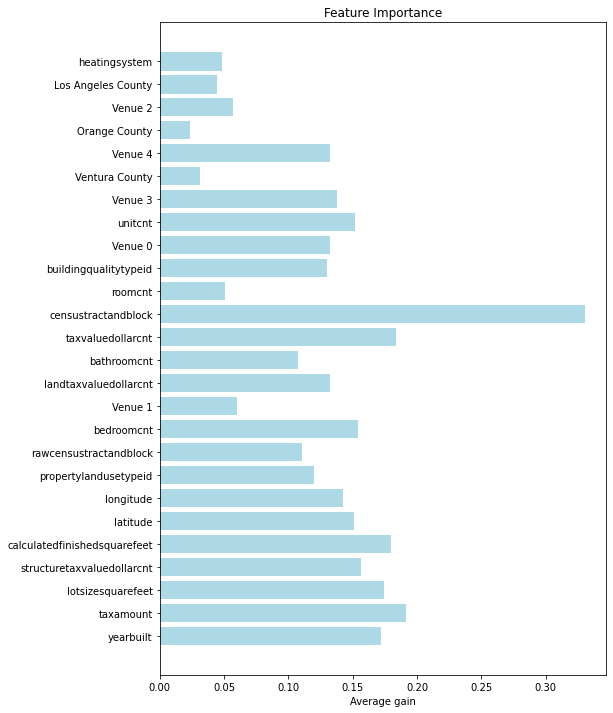

In [0]:
ind1 = np.arange(len(feat_imp))

fig, ax = plt.subplots(figsize=(8,12))
rects = ax.barh(ind1, feat_imp.values(), color='lightblue')
ax.set_yticks(ind1)
ax.set_yticklabels(feat_imp.keys(), rotation='horizontal')
ax.set_xlabel("Average gain")
ax.set_title("Feature Importance")

plt.show()

## 7. Model Evaluation

<div style="text-align: justify">The model was evaluated on the basis of several metrics (MAE, MSE, RMSE, R2, Adj R2 and Explained Variance) both for the  train and test sets.</div>

In [0]:
#Define a function to provide evaluation metrics

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score

def evaluation_metrics(y_train, y_test, y_pred_trn, y_pred_tst):
    
    """
    Retrieves a dataframe with the main evaluation metrics of a machine learning algorithm by imputting the train labels, test labels and the predictions of the algorithm.
    """
 
    mae_test = mean_absolute_error(y_test, y_pred_tst)
    mae_train = mean_absolute_error(y_train, y_pred_trn)

    mse_test = mean_squared_error(y_test, y_pred_tst)
    mse_train = mean_squared_error(y_train, y_pred_trn)
    
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_tst))
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_trn))
        
    r2_train = r2_score(y_train,y_pred_trn)
    r2_test = r2_score(y_test,y_pred_tst)
    
    def adj_rsquared(y, y_pred): # Calculating the Adjusted R Squared 

        adj = 1 - float(len(y)-1)/(len(y)-100-1)*(1 - r2_score(y,y_pred))

        return adj
    
    ar2_train = adj_rsquared(y_train, y_pred_trn)
    ar2_test = adj_rsquared(y_test, y_pred_tst)
    
    EV_trn = explained_variance_score(y_train, y_pred_trn)
    EV_tst = explained_variance_score(y_test, y_pred_tst)
    
    return pd.DataFrame(data = {"MAE": [mae_train, mae_test]  , "MSE": [mse_train, mse_test] , "RMSE": [rmse_train, rmse_test], "R2": [r2_train, r2_test], "Adjusted R2" : [ar2_train, ar2_test], "Explained Variance": [EV_trn, EV_tst]}, 
                        index = ["Train Set", "Test set"])



In [0]:
y_pred_trn = best_model.predict(dtrain)
y_pred_tst = best_model.predict(dtest)


evaluation_metrics(y_train, y_test, y_pred_trn, y_pred_tst)

,MAE,MSE,RMSE,R2,Adjusted R2,Explained Variance
Train Set,0.023363,0.001559,0.039478,0.848715,0.848679,0.848715
Test set,0.026112,0.002207,0.046975,0.787555,0.787355,0.787556


<div style="text-align: justify">The results show a MAE consistent among the train and test sets, and an outstanding R2 in the test set. This means that the model is capable of explaininng more than 78% of the label values in the test set.</div>

In [0]:
#Save model

best_model.save_model("XGB_Zillow.model")

In [0]:
#Load model

loaded_model = xgb.Booster()
loaded_model.load_model("XGB_Zillow.model")

# And use it for predictions.

#loaded_model.predict(dtest)

[22:54:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


<div style="text-align: justify"> Here, the focus was purely on 2016 properties. So, it is now that the model is going to be applied to fresh "new" data - properties 2017. Moreover, it will be assessed if the model has any explanatory meaning to the real life. The first procedure was to clean the data.</div>

In [0]:
# Importing csv file

url = "properties_2017_cleaned.csv"
prop_2017_clean = pd.read_csv(url)

In [0]:
# Loading Logerror 

train2017 = pd.read_csv('test_2017.csv', parse_dates=['transactiondate'], low_memory=False)

In [0]:
df_train17 = prop_2017_clean.join(train2017)
df_train17 = df_train17.drop(columns = ["transactiondate", "parcelid"])

In [0]:
dtest = xgb.DMatrix(df_train17[X.columns], label=df_train17["logerror"])

In [0]:
y_pred_2017 = loaded_model.predict(dtest)

In [0]:
mae_test = mean_absolute_error(df_train17["logerror"], y_pred_2017)

mse_test = mean_squared_error(df_train17["logerror"], y_pred_2017)

rmse_test = np.sqrt(mean_squared_error(df_train17["logerror"], y_pred_2017))
        
r2_train = r2_score(df_train17["logerror"],y_pred_2017)

EV_trn = explained_variance_score(df_train17["logerror"], y_pred_2017)

In [0]:
f_2017 = pd.DataFrame(data = {"MAE": [mae_test]  , "MSE": [mse_test] , "RMSE": [rmse_test], "R2": [r2_train], "Explained Variance": [EV_trn]}, 
                        index = ["Property 2017"])

In [0]:
f_2017

,MAE,MSE,RMSE,R2,Explained Variance
Property 2017,0.083595,0.028999,0.170292,-0.069506,-0.068933


## 8. XGB Performance Against Baseline Model

<div style="text-align: justify">As the final step of the work, the Zestimate errors will be compared with the hypothetical errors if Zillow would incorporate the XGBoost model. It is shown numerically and graphically that the performance of the Zestimate would increase exponentially with the adoption of the proposed solution.</div>

In [0]:
# Obtaining the log-errors of XGB model and comparing against Zestimate errors

predicted_error = loaded_model.predict(dtest)
actual_error = y_test
error_XGB = actual_error - predicted_error
errors = pd.DataFrame(data = {'XGB error':error_XGB,'Zestimate error': actual_error} )
errors.head()

,XGB error,Zestimate error
0,0.007833,0.0218
1,0.000899,0.0237
2,0.012428,0.0402
3,-0.004713,-0.0305
4,0.003240,-0.0030


In [0]:
Absolute_error_Z = np.abs(actual_error).sum()
Absolute_error_XGB = np.abs(error_XGB).sum()
Increased_performance = 1 - (Absolute_error_XGB / Absolute_error_Z)

print('Total Absolute Error Zestimate: {:.2f}'.format(Absolute_error_Z))
print('Total Absolute Error XGBoost: {:.2f}'.format(Absolute_error_XGB))
print('Error reduction: {:.2%}'.format(Increased_performance))

Total Absolute Error Zestimate: 6561.90
Total Absolute Error XGBoost: 2778.99
Error reduction: 57.65%


The adoption of the model would reduce more than 85% of the current Zestimate errors.

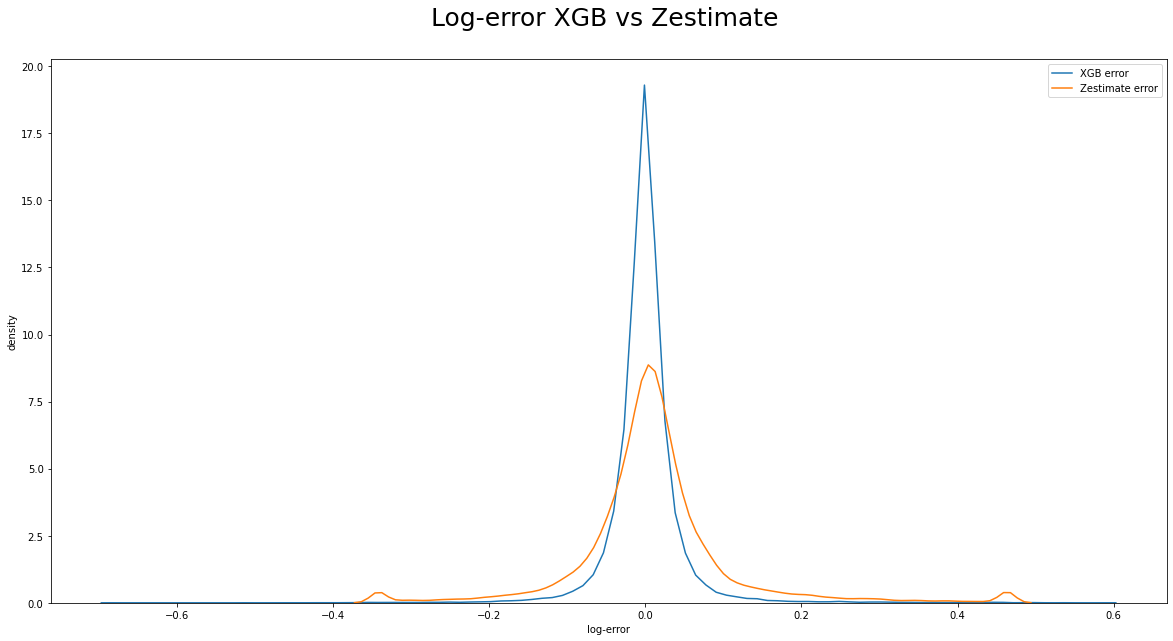

In [0]:
# Plotting distributions of log-error with XGB vs Zestimate current logerror

fig = plt.figure(figsize =(20,10))
sns.distplot(errors[['XGB error']], hist=False, rug=False, label = 'XGB error' )
sns.distplot(errors[['Zestimate error']], hist=False, rug=False, label = 'Zestimate error')
plt.title('Log-error XGB vs Zestimate \n', fontsize=25)
plt.xlabel('log-error')
plt.ylabel('density')
plt.show()

<div style="text-align: justify">As the chart shows, an implementation of the suggested XGB model, would supposedly increase exponentially the accuracy of Zillow predictions. The distribution shows an intense concentration of the XGB errors around 0, while the Zestimate errors are much more disperse. </div>

### Conclusion and Future Steps

<div style="text-align: justify">In this chapter, it is going to be discussed how other researchers may improve this model and also to point out some of the constraints encountered. The first constraint that is important to be mentioned is computational power. This was critical, because it consumed a lot of time, in running certain lines of code, which constrained several possibilities that the group idealized to improve our model. For future housing projects, to attain better results, a more in-depth feature engineering could be done, in terms of studying the relationship between demand and supply and also trying to assess how much each county contributes to the U.S. GDP growth. Moreover, when doing the missing values imputation, a higher level of neighbors could be implemented as a measure to better distinguish the different properties in each segment. Furthermore, in the last step when dealing with missing values, a more rule-based technique should be implemented, instead of eliminating rows.

</div>